In [142]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

In [143]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [144]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Buket
[nltk_data]     Fildisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [145]:
stop_words.extend(['greenstoneplus','Source','Resources','Links'])

In [146]:
dff= pd.read_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/LinkedInData.xlsx')
dff.head()#######################

,Date,Topic,Content,Link
0,2023-09-13,5 things businesses should consider now for su...,In an era of heightened awareness surrounding ...,https://www.linkedin.com/pulse/5-things-busine...
1,2023-09-06,Key takeaways from the SBTi Monitoring Report ...,SBTi recently published its fourth report titl...,https://www.linkedin.com/pulse/key-takeaways-f...
2,2023-08-23,Why investors are seeking ESG software to mana...,"Across the asset-management world, interest in...",https://www.linkedin.com/pulse/why-investors-s...
3,2023-08-16,Why procurement teams are seeking supply chain...,Procurement and supply chain management is evo...,https://www.linkedin.com/pulse/why-procurement...
4,2023-08-09,EU Commission adopts final ESRS sustainability...,The European Commission has adopted the first ...,https://www.linkedin.com/pulse/eu-commission-a...


In [147]:
df=dff[['Content']]
df.head()

,Content
0,In an era of heightened awareness surrounding ...
1,SBTi recently published its fourth report titl...
2,"Across the asset-management world, interest in..."
3,Procurement and supply chain management is evo...
4,The European Commission has adopted the first ...


In [148]:
df['Content']=df['Content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))
df

C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_12660\3417470200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content']=df['Content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))


,Content
0,era heightened awareness surrounding environme...
1,"SBTi recently published fourth report titled ""..."
2,"Across asset-management world, interest Enviro..."
3,"Procurement supply chain management evolving, ..."
4,European Commission adopted first set 12 Europ...
...,...
57,One publicised immediate impacts global COVID-...
58,"6 April 2022, European Commission published lo..."
59,"last year, significant progress made unifying ..."
60,Measuring reporting scope 3 GHG emissions accu...


In [149]:
df_list=df["Content"].values.tolist()
df_list

["era heightened awareness surrounding environmental sustainability corporate responsibility, businesses increasing pressure accurately report carbon emissions sustainability efforts. Carbon Disclosure Project (CDP) vital platform organisations transparently share environmental data, strategies, commitments. However, successful CDP reporting requires year-round strategic approach goes beyond simply meeting July disclosure deadlines.This article delves five crucial practices sustainable businesses adopt ensure effective CDP reporting fostering long-term environmental stewardship.1. Don’t lose momentumMany organisations start CDP reporting shortly prior deadline treat disclosure project, CDP reporting integral component company’s sustainability strategy. Embedding CDP reporting part ongoing program ensure checking post-CDP actions laying foundations next year’s reporting.This approach bolsters credibility reporting also cultivates internal “culture sustainability” within organisation. co

In [150]:
import string
import re
def text_clean_1(text):
    text = text.lower()
    text= text.replace(".  ",".");
    text= text.replace("'  ',","");
    text= text.replace(" '","'");
    text= text.replace("  ","");
    text= text.replace("▶ ","");
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

In [151]:
text_clean_1(df_list[3])

'procurement supply chain management evolving ways businesses interact suppliers manage relationships them make purchasing decisionsprocurement teams tasked ensuring suppliers meet standards set organisation business exposed supply chain risk also responsible building maintaining supplier relationships looking ways engage supplier base top this ever procurement professionals scrutiny also ensure business supply chain operating sustainably environmental social governance esg compliance perspective supply chain sustainability software obvious way streamline supplier data collection questionnaire distribution management process procurement professionals seeking purposebuilt supply chain sustainability software platforms collect track analyse supplier data ghg emissions ongoing basis blog focuses number key reasons procurement professionals seeking supply chain sustainability software1 transparency comparabilitysupply chain sustainability softwarexa0enables buyers customise questionnaires 

In [152]:
def remove_stopwords(input_list):
    stop_words = set(stopwords.words('english'))  # You can change 'english' to the appropriate language
    filtered_list = [word for word in input_list if word.lower() not in stop_words]
    return filtered_list

In [153]:
doc=[]
for i in range(len(df_list)):
    doc.append(text_clean_1(df_list[i]))
doc


['era heightened awareness surrounding environmental sustainability corporate responsibility businesses increasing pressure accurately report carbon emissions sustainability efforts carbon disclosure project cdp vital platform organisations transparently share environmental data strategies commitments however successful cdp reporting requires yearround strategic approach goes beyond simply meeting july disclosure deadlinesthis article delves five crucial practices sustainable businesses adopt ensure effective cdp reporting fostering longterm environmental stewardship1 don’t lose momentummany organisations start cdp reporting shortly prior deadline treat disclosure project cdp reporting integral component company’s sustainability strategy embedding cdp reporting part ongoing program ensure checking postcdp actions laying foundations next year’s reportingthis approach bolsters credibility reporting also cultivates internal “culture sustainability” within organisation consistently address

In [154]:
type(doc)

list

In [155]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [156]:
doc[1]

'sbti recently published fourth report titled sbti monitoring report 2022  looking back 2022 moving forward 2023 beyond comprehensive report delves worldwide advancements sciencebased targets reveals remarkable ongoing surge adoption sciencetargets companies financial institutions trend persists despite escalating challenges prevalent global stagegreenstone curated article captures key insights reportestablished 2014 science based targets initiative sbti collaboration among organisations including cdp united nations global compact world resources institute wri world wide fund nature wwf mean business coalition assists global companies financial institutions setting sciencebased ghg emissions reduction targets striving ambitious corporate climate action sbti mission involves aligning businesses climate science cutting emissions contributing goal limiting global warming 15°csbti prioritises emission reduction offering sectorspecific guidance highemission industries facilitating action ar

In [157]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
        # deacc=True removes punctuations

data_words = list(sent_to_words(doc))

print(data_words[:1])

[['era', 'heightened', 'awareness', 'surrounding', 'environmental', 'sustainability', 'corporate', 'responsibility', 'businesses', 'increasing', 'pressure', 'accurately', 'report', 'carbon', 'emissions', 'sustainability', 'efforts', 'carbon', 'disclosure', 'project', 'cdp', 'vital', 'platform', 'organisations', 'transparently', 'share', 'environmental', 'data', 'strategies', 'commitments', 'however', 'successful', 'cdp', 'reporting', 'requires', 'yearround', 'strategic', 'approach', 'goes', 'beyond', 'simply', 'meeting', 'july', 'disclosure', 'deadlinesthis', 'article', 'delves', 'five', 'crucial', 'practices', 'sustainable', 'businesses', 'adopt', 'ensure', 'effective', 'cdp', 'reporting', 'fostering', 'longterm', 'environmental', 'stewardship', 'don', 'lose', 'momentummany', 'organisations', 'start', 'cdp', 'reporting', 'shortly', 'prior', 'deadline', 'treat', 'disclosure', 'project', 'cdp', 'reporting', 'integral', 'component', 'company', 'sustainability', 'strategy', 'embedding', '

In [158]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(doc, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[doc], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['era', 'heightened', 'awareness', 'surrounding', 'environmental', 'sustainability', 'corporate', 'responsibility', 'businesses', 'increasing', 'pressure', 'accurately', 'report', 'carbon', 'emissions', 'sustainability', 'efforts', 'carbon', 'disclosure', 'project', 'cdp', 'vital', 'platform', 'organisations', 'transparently', 'share', 'environmental', 'data', 'strategies', 'commitments', 'however', 'successful', 'cdp', 'reporting', 'requires', 'yearround', 'strategic', 'approach', 'goes', 'beyond', 'simply', 'meeting', 'july', 'disclosure', 'deadlinesthis', 'article', 'delves', 'five', 'crucial', 'practices', 'sustainable', 'businesses', 'adopt', 'ensure', 'effective', 'cdp', 'reporting', 'fostering', 'longterm', 'environmental', 'stewardship', 'don', 'lose', 'momentummany', 'organisations', 'start', 'cdp', 'reporting', 'shortly', 'prior', 'deadline', 'treat', 'disclosure', 'project', 'cdp', 'reporting', 'integral', 'component', 'company', 'sustainability', 'strategy', 'embedding', 'c

In [159]:
# Define functions for bigrams, trigrams and lemmatization
import io
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [160]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")

#lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['era', 'heighten', 'awareness', 'surround', 'environmental', 'sustainability', 'corporate', 'responsibility', 'business', 'increase', 'pressure', 'accurately', 'report', 'carbon', 'emission', 'sustainability', 'effort', 'carbon', 'project', 'vital', 'platform', 'organisation', 'transparently', 'share', 'environmental', 'datum', 'strategy', 'commitment', 'however', 'successful', 'cdp', 'reporting', 'require', 'yearround', 'strategic', 'approach', 'go', 'simply', 'meet', 'disclosure', 'article', 'delve', 'crucial', 'practice', 'sustainable', 'business', 'adopt', 'ensure', 'effective', 'cdp', 'reporting', 'foster', 'longterm', 'environmental', 'stewardship', 'lose', 'organisation', 'start', 'cdp', 'reporting', 'shortly', 'prior', 'deadline', 'treat', 'disclosure', 'project', 'cdp', 'report', 'integral', 'component', 'company', 'sustainability', 'strategy', 'embed', 'cdp', 'report', 'part', 'ongoing', 'program', 'ensure', 'check', 'postcdp', 'action', 'lay', 'foundation', 'next', 'year',

In [161]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 2), (3, 2), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 4), (19, 6), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 3), (32, 1), (33, 3), (34, 1), (35, 11), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 7), (43, 1), (44, 3), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 3), (58, 1), (59, 1), (60, 2), (61, 1), (62, 1), (63, 2), (64, 1), (65, 9), (66, 3), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 2), (79, 1), (80, 3), (81, 1), (82, 1), (83, 2), (84, 1), (85, 7), (86, 4), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 2), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 2), (110, 2

In [162]:
id2word[0]

'accomplishment'

In [163]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('accomplishment', 1),
  ('accredit', 2),
  ('accurate', 2),
  ('accurately', 2),
  ('action', 1),
  ('address', 1),
  ('adopt', 1),
  ('advance', 2),
  ('aggregation', 1),
  ('agree', 1),
  ('align', 2),
  ('alignment', 1),
  ('allocate', 1),
  ('allow', 1),
  ('also', 1),
  ('analyse', 1),
  ('analysis', 1),
  ('annual', 1),
  ('approach', 4),
  ('approval', 6),
  ('approve', 1),
  ('area', 1),
  ('article', 1),
  ('assist', 1),
  ('assurance', 3),
  ('auditor', 1),
  ('awareness', 1),
  ('become', 1),
  ('bespoke', 1),
  ('bolster', 1),
  ('boost', 1),
  ('business', 3),
  ('candefine', 1),
  ('carbon', 3),
  ('category', 1),
  ('cdp', 11),
  ('cdpgreenstone', 1),
  ('change', 1),
  ('check', 1),
  ('clear', 2),
  ('climate', 1),
  ('collection', 1),
  ('commitment', 7),
  ('communication', 1),
  ('company', 3),
  ('complete', 1),
  ('component', 1),
  ('comprehensive', 1),
  ('concern', 2),
  ('conduct', 1),
  ('confidence', 1),
  ('conservation', 1),
  ('consistently', 1),
  ('c

In [164]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=38,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [165]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(19, '0.001*"company" + 0.001*"supplier" + 0.001*"emission" + 0.001*"target" + 0.001*"datum" + 0.001*"scope" + 0.001*"organisation" + 0.001*"biodiversity" + 0.001*"risk" + 0.001*"business"'), (16, '0.001*"supplier" + 0.000*"supply" + 0.000*"company" + 0.000*"business" + 0.000*"process" + 0.000*"report" + 0.000*"risk" + 0.000*"chain" + 0.000*"datum" + 0.000*"sustainability"'), (27, '0.001*"report" + 0.001*"company" + 0.001*"sustainability" + 0.001*"target" + 0.001*"labour" + 0.001*"emission" + 0.000*"climate" + 0.000*"provide" + 0.000*"day" + 0.000*"business"'), (36, '0.001*"company" + 0.001*"biodiversity" + 0.001*"financial" + 0.001*"risk" + 0.001*"report" + 0.001*"business" + 0.001*"disclosure" + 0.000*"supplier" + 0.000*"labour" + 0.000*"impact"'), (23, '0.001*"emission" + 0.001*"supplier" + 0.001*"chain" + 0.001*"company" + 0.001*"supply" + 0.001*"use" + 0.001*"datum" + 0.001*"change" + 0.001*"climate" + 0.001*"organisation"'), (8, '0.001*"datum" + 0.001*"emission" + 0.001*"softwar

In [166]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.100482245873763

Coherence Score:  0.3546268764208679


In [167]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\Buket Fildisi\anaconda3\Lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
22    -0.146455  0.167122       1        1  16.475760
14    -0.146093  0.053630       2        1  14.241419
34    -0.155207  0.071826       3        1  12.869121
37    -0.197550  0.000178       4        1  12.083707
15    -0.198760 -0.052992       5        1   7.036041
28    -0.187485  0.193566       6        1   5.926379
2     -0.160365 -0.047273       7        1   4.728969
31    -0.117331 -0.082322       8        1   2.548257
11    -0.141418 -0.040362       9        1   2.504139
29    -0.108701 -0.089608      10        1   2.451170
35    -0.074686  0.139339      11        1   2.420885
17    -0.059343 -0.093557      12        1   2.244607
18    -0.098581 -0.047953      13        1   2.243156
25    -0.142452 -0.095368      14        1   2.022259
9     -0.078667 -0.148096      15        1   1.822852
0     -0.030700 -0.044654      16        1   1.342250
20     0.026392 -0.129506      17        1   1.211225
33     0.002039  0.115967      18        1   1.097523
6     -0.074350 -0.043030      19        1   1.073311
26    -0.016059  0.070001      20        1   1.060842
12    -0.020284  0.035121      21        1   0.897861
7      0.014669  0.035672      22        1   0.820614
1      0.052715 -0.087609      23        1   0.799935
10     0.122128  0.001384      24        1   0.026878
4      0.104743  0.012165      25        1   0.004065
32     0.119474  0.015829      26        1   0.003903
5      0.117727  0.012549      27        1   0.003876
24     0.136038  0.004693      28        1   0.003843
3      0.133419  0.010157      29        1   0.003715
13     0.137461  0.013477      30        1   0.003686
21     0.144527  0.008799      31        1   0.003571
30     0.143541  0.008326      32        1   0.003569
8      0.150719  0.004540      33        1   0.003517
23     0.147107  0.006477      34        1   0.003468
36     0.149132  0.005067      35        1   0.003438
27     0.151913  0.003356      36        1   0.003413
19     0.148616  0.005554      37        1   0.003389
16     0.152126  0.007534      38        1   0.003387, topic_info=            Term        Freq       Total Category  logprob  loglift
402     supplier  397.000000  397.000000  Default  30.0000  30.0000
80      emission  390.000000  390.000000  Default  29.0000  29.0000
44       company  548.000000  548.000000  Default  28.0000  28.0000
217       target  190.000000  190.000000  Default  27.0000  27.0000
174       report  453.000000  453.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
109      include    0.000407  181.340237  Topic38  -7.8662  -2.7147
80      emission    0.000416  390.212940  Topic38  -7.8437  -3.4584
113  information    0.000405  160.871212  Topic38  -7.8715  -2.6001
135         need    0.000399  155.812494  Topic38  -7.8857  -2.5824
175    reporting    0.000395  195.651364  Topic38  -7.8966  -2.8210

[2735 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
3010     11  0.688359               ab
762       1  0.447036          ability
762       2  0.255449          ability
762      10  0.255449          ability
762      17  0.063862          ability
...     ...       ...              ...
424      15  0.608170       yearonyear
2951     14  0.683185        yearother
1298      2  0.667111  yearspossessing
2590     12  0.855950            youth
2615     21  0.761385             zone

[4514 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[23, 15, 35, 38, 16, 29, 3, 32, 12, 30, 36, 18, 19, 26, 10, 1, 21, 34, 7, 27, 13, 8, 2, 11, 5, 33, 6, 25, 4, 14, 22, 31, 9, 24, 37, 28, 20, 17])

In [168]:
#Building LDA Mallet Model
#import os
#from gensim.models.wrappers import LdaMallet
#mallet_path = 'C:/Users/Buket Fildisi/mallet-2.0.8/bin/mallet' # update this path
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

How to find optimal number of topic

In [169]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics)
        #gensim.models.wrappers.LdaMallet( corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [170]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

In [171]:
#If the coherence score seems to keep increasing, 
#it may make better sense to pick the model that gave the highest CV before flattening out.
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2732
Num Topics = 8  has Coherence Value of 0.2934
Num Topics = 14  has Coherence Value of 0.2862
Num Topics = 20  has Coherence Value of 0.2942
Num Topics = 26  has Coherence Value of 0.2937
Num Topics = 32  has Coherence Value of 0.3006
Num Topics = 38  has Coherence Value of 0.3037


In [74]:
model_list[6]

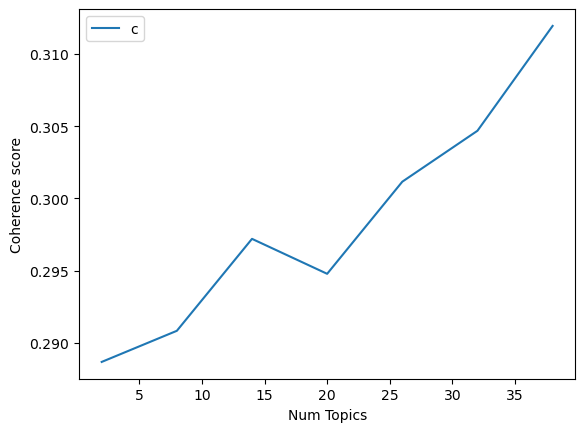

In [75]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [79]:
# Select the model and print the topics
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(8, '0.023*"emission" + 0.020*"company" + 0.018*"datum" + 0.011*"esg" + 0.011*"report" + 0.010*"scope" + 0.010*"sustainability" + 0.008*"organisation" + 0.007*"target" + 0.007*"carbon"'), (33, '0.019*"report" + 0.019*"sustainability" + 0.017*"company" + 0.010*"esg" + 0.009*"business" + 0.008*"datum" + 0.008*"risk" + 0.008*"standard" + 0.007*"software" + 0.007*"reporting"'), (7, '0.021*"company" + 0.015*"esg" + 0.013*"emission" + 0.012*"report" + 0.011*"target" + 0.011*"software" + 0.011*"datum" + 0.011*"sustainability" + 0.010*"investor" + 0.008*"organisation"'), (19, '0.031*"standard" + 0.014*"report" + 0.014*"sustainability" + 0.011*"sasb" + 0.011*"disclosure" + 0.011*"issb" + 0.010*"company" + 0.008*"information" + 0.008*"financial" + 0.007*"use"'), (14, '0.022*"report" + 0.014*"sustainability" + 0.012*"company" + 0.009*"disclosure" + 0.009*"provide" + 0.008*"financial" + 0.008*"supply" + 0.007*"standard" + 0.007*"information" + 0.007*"scope"'), (37, '0.025*"company" + 0.016*"suppl

In [80]:
visOpt = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
visOpt
#we can see the optimal topic number 

C:\Users\Buket Fildisi\anaconda3\Lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
30    -0.006631 -0.041825       1        1  25.217536
15    -0.037534 -0.052516       2        1  16.115406
2     -0.041200 -0.032424       3        1  11.620558
25    -0.025043 -0.016807       4        1   9.818328
23    -0.024180 -0.003985       5        1   7.145953
16    -0.037277  0.009379       6        1   6.350797
28     0.000306 -0.019183       7        1   5.407733
37    -0.011986 -0.015642       8        1   3.895522
36    -0.016873 -0.026488       9        1   2.567407
3     -0.029351  0.040642      10        1   1.764953
29    -0.019407 -0.013214      11        1   1.693857
7     -0.021311 -0.006705      12        1   1.250770
5      0.043076 -0.046906      13        1   0.959268
9     -0.041194 -0.010119      14        1   0.804697
33    -0.029416  0.007966      15        1   0.796141
27    -0.011056  0.007811      16        1   0.781138
26     0.022402 -0.013775      17        1   0.713668
6     -0.017367 -0.026072      18        1   0.704834
12     0.026626 -0.019957      19        1   0.631078
35     0.000737  0.034160      20        1   0.581601
24    -0.002256  0.040004      21        1   0.477807
22    -0.035354  0.014278      22        1   0.265489
18     0.026546  0.020124      23        1   0.134409
19    -0.008117  0.073401      24        1   0.122186
8     -0.023315 -0.013673      25        1   0.081654
11    -0.022882  0.008450      26        1   0.034338
20     0.027420 -0.027365      27        1   0.005501
21    -0.016752 -0.012106      28        1   0.005215
1      0.063509  0.008484      29        1   0.005215
17     0.098243  0.004423      30        1   0.005215
14    -0.000396  0.026694      31        1   0.005215
13    -0.001754  0.033313      32        1   0.005215
31     0.047792  0.042587      33        1   0.005215
32     0.036483 -0.029333      34        1   0.005215
10    -0.014132  0.054917      35        1   0.005215
34     0.038697 -0.025294      36        1   0.005215
4      0.053136 -0.013828      37        1   0.005215
0      0.009812  0.040587      38        1   0.005215, topic_info=               Term        Freq       Total Category  logprob  loglift
402        supplier  426.000000  426.000000  Default  30.0000  30.0000
44          company  542.000000  542.000000  Default  29.0000  29.0000
65            datum  440.000000  440.000000  Default  28.0000  28.0000
174          report  456.000000  456.000000  Default  27.0000  27.0000
215  sustainability  363.000000  363.000000  Default  26.0000  26.0000
..              ...         ...         ...      ...      ...      ...
65            datum    0.007494  440.436949  Topic38  -5.3843  -1.1202
258           chain    0.006199  218.661797  Topic38  -5.5741  -0.6096
403          supply    0.005796  190.700784  Topic38  -5.6413  -0.5400
402        supplier    0.006036  426.028425  Topic38  -5.6007  -1.3033
14             also    0.005429  155.457654  Topic38  -5.7067  -0.4011

[2900 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
761       7  0.510123    abide
762       1  0.303653  ability
762       2  0.121461  ability
762       3  0.060731  ability
762       4  0.121461  ability
...     ...       ...      ...
236      15  0.011293     year
236      17  0.011293     year
236      18  0.011293     year
236      20  0.011293     year
236      21  0.011293     year

[4197 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[31, 16, 3, 26, 24, 17, 29, 38, 37, 4, 30, 8, 6, 10, 34, 28, 27, 7, 13, 36, 25, 23, 19, 20, 9, 12, 21, 22, 2, 18, 15, 14, 32, 33, 11, 35, 5, 1])

In [172]:
#to find dominant topic in each doc
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_12660\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_12660\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_12660\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,37,0.6995,"company, supplier, risk, sustainability, discl...","[era, heighten, awareness, surround, environme..."
1,1,3,0.9981,"target, company, report, emission, climate, sc...","[recently, publish, fourth, report, title, sbt..."
2,2,2,0.8117,"esg, datum, company, report, emission, softwar...","[assetmanagement, world, interest, environment..."
3,3,30,0.4825,"supplier, emission, esg, datum, report, compan...","[procurement, supply, chain, management, evolv..."
4,4,36,0.9952,"company, report, sustainability, emission, sup...","[adopt, first, set, european, sustainability, ..."
5,5,28,0.7421,"supplier, sustainability, esg, report, company...","[grow, interest, esg, corporate, responsibilit..."
6,6,28,0.9965,"supplier, sustainability, esg, report, company...","[sustainable, finance, disclosure, regulation,..."
7,7,2,0.6557,"esg, datum, company, report, emission, softwar...","[nonfinancial, esg, sustainability, report, la..."
8,8,33,0.8748,"report, sustainability, company, esg, business...","[international, sustainability, standard, boar..."
9,9,25,0.9423,"sustainability, company, datum, report, esg, r...","[reporting, become, increasingly, important, g..."


In [173]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,37,0.6995,"company, supplier, risk, sustainability, discl...","[era, heighten, awareness, surround, environme..."
1,1,3,0.9981,"target, company, report, emission, climate, sc...","[recently, publish, fourth, report, title, sbt..."
2,2,2,0.8117,"esg, datum, company, report, emission, softwar...","[assetmanagement, world, interest, environment..."
3,3,30,0.4825,"supplier, emission, esg, datum, report, compan...","[procurement, supply, chain, management, evolv..."
4,4,36,0.9952,"company, report, sustainability, emission, sup...","[adopt, first, set, european, sustainability, ..."
...,...,...,...,...,...
57,57,30,0.9955,"supplier, emission, esg, datum, report, compan...","[publicise, immediate, impact, global, covid, ..."
58,58,2,0.4675,"esg, datum, company, report, emission, softwar...","[longawaite, final, version, detail, rule, reg..."
59,59,29,0.8847,"report, emission, supplier, company, standard,...","[last, year, significant, progress, make, unif..."
60,60,15,0.9982,"emission, datum, scope, company, report, suppl...","[measure, report, scope, ghg, emission, accura..."


In [174]:
df_dominant_topic.to_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/Results/LinkedInData_doc.xlsx')

In [175]:
#Topic Distribution 
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,37,"company, supplier, risk, sustainability, discl...",NaN,NaN
1,3,"target, company, report, emission, climate, sc...",NaN,NaN
2,2,"esg, datum, company, report, emission, softwar...",7.0,0.1129
3,30,"supplier, emission, esg, datum, report, compan...",1.0,0.0161
4,36,"company, report, sustainability, emission, sup...",NaN,NaN
...,...,...,...,...
57,30,"supplier, emission, esg, datum, report, compan...",NaN,NaN
58,2,"esg, datum, company, report, emission, softwar...",NaN,NaN
59,29,"report, emission, supplier, company, standard,...",NaN,NaN
60,15,"emission, datum, scope, company, report, suppl...",NaN,NaN


In [176]:
d = df_dominant_topics['Topic_Keywords'].tolist()
wordclouddeneme= ' '.join(map(str, d)) 
wordclouddeneme

'company, supplier, risk, sustainability, disclosure, esg, organisation, process, report, standard target, company, report, emission, climate, sciencebase, set, sustainability, change, scope esg, datum, company, report, emission, software, sustainability, use, scope, also supplier, emission, esg, datum, report, company, risk, scope, chain, supply company, report, sustainability, emission, supplier, risk, datum, esg, reporting, standard supplier, sustainability, esg, report, company, risk, financial, information, impact, disclosure supplier, sustainability, esg, report, company, risk, financial, information, impact, disclosure esg, datum, company, report, emission, software, sustainability, use, scope, also report, sustainability, company, esg, business, datum, risk, standard, software, reporting sustainability, company, datum, report, esg, reporting, emission, include, risk, supplier supplier, emission, esg, datum, report, company, risk, scope, chain, supply company, report, datum, tar

In [177]:
from wordcloud import WordCloud, STOPWORDS

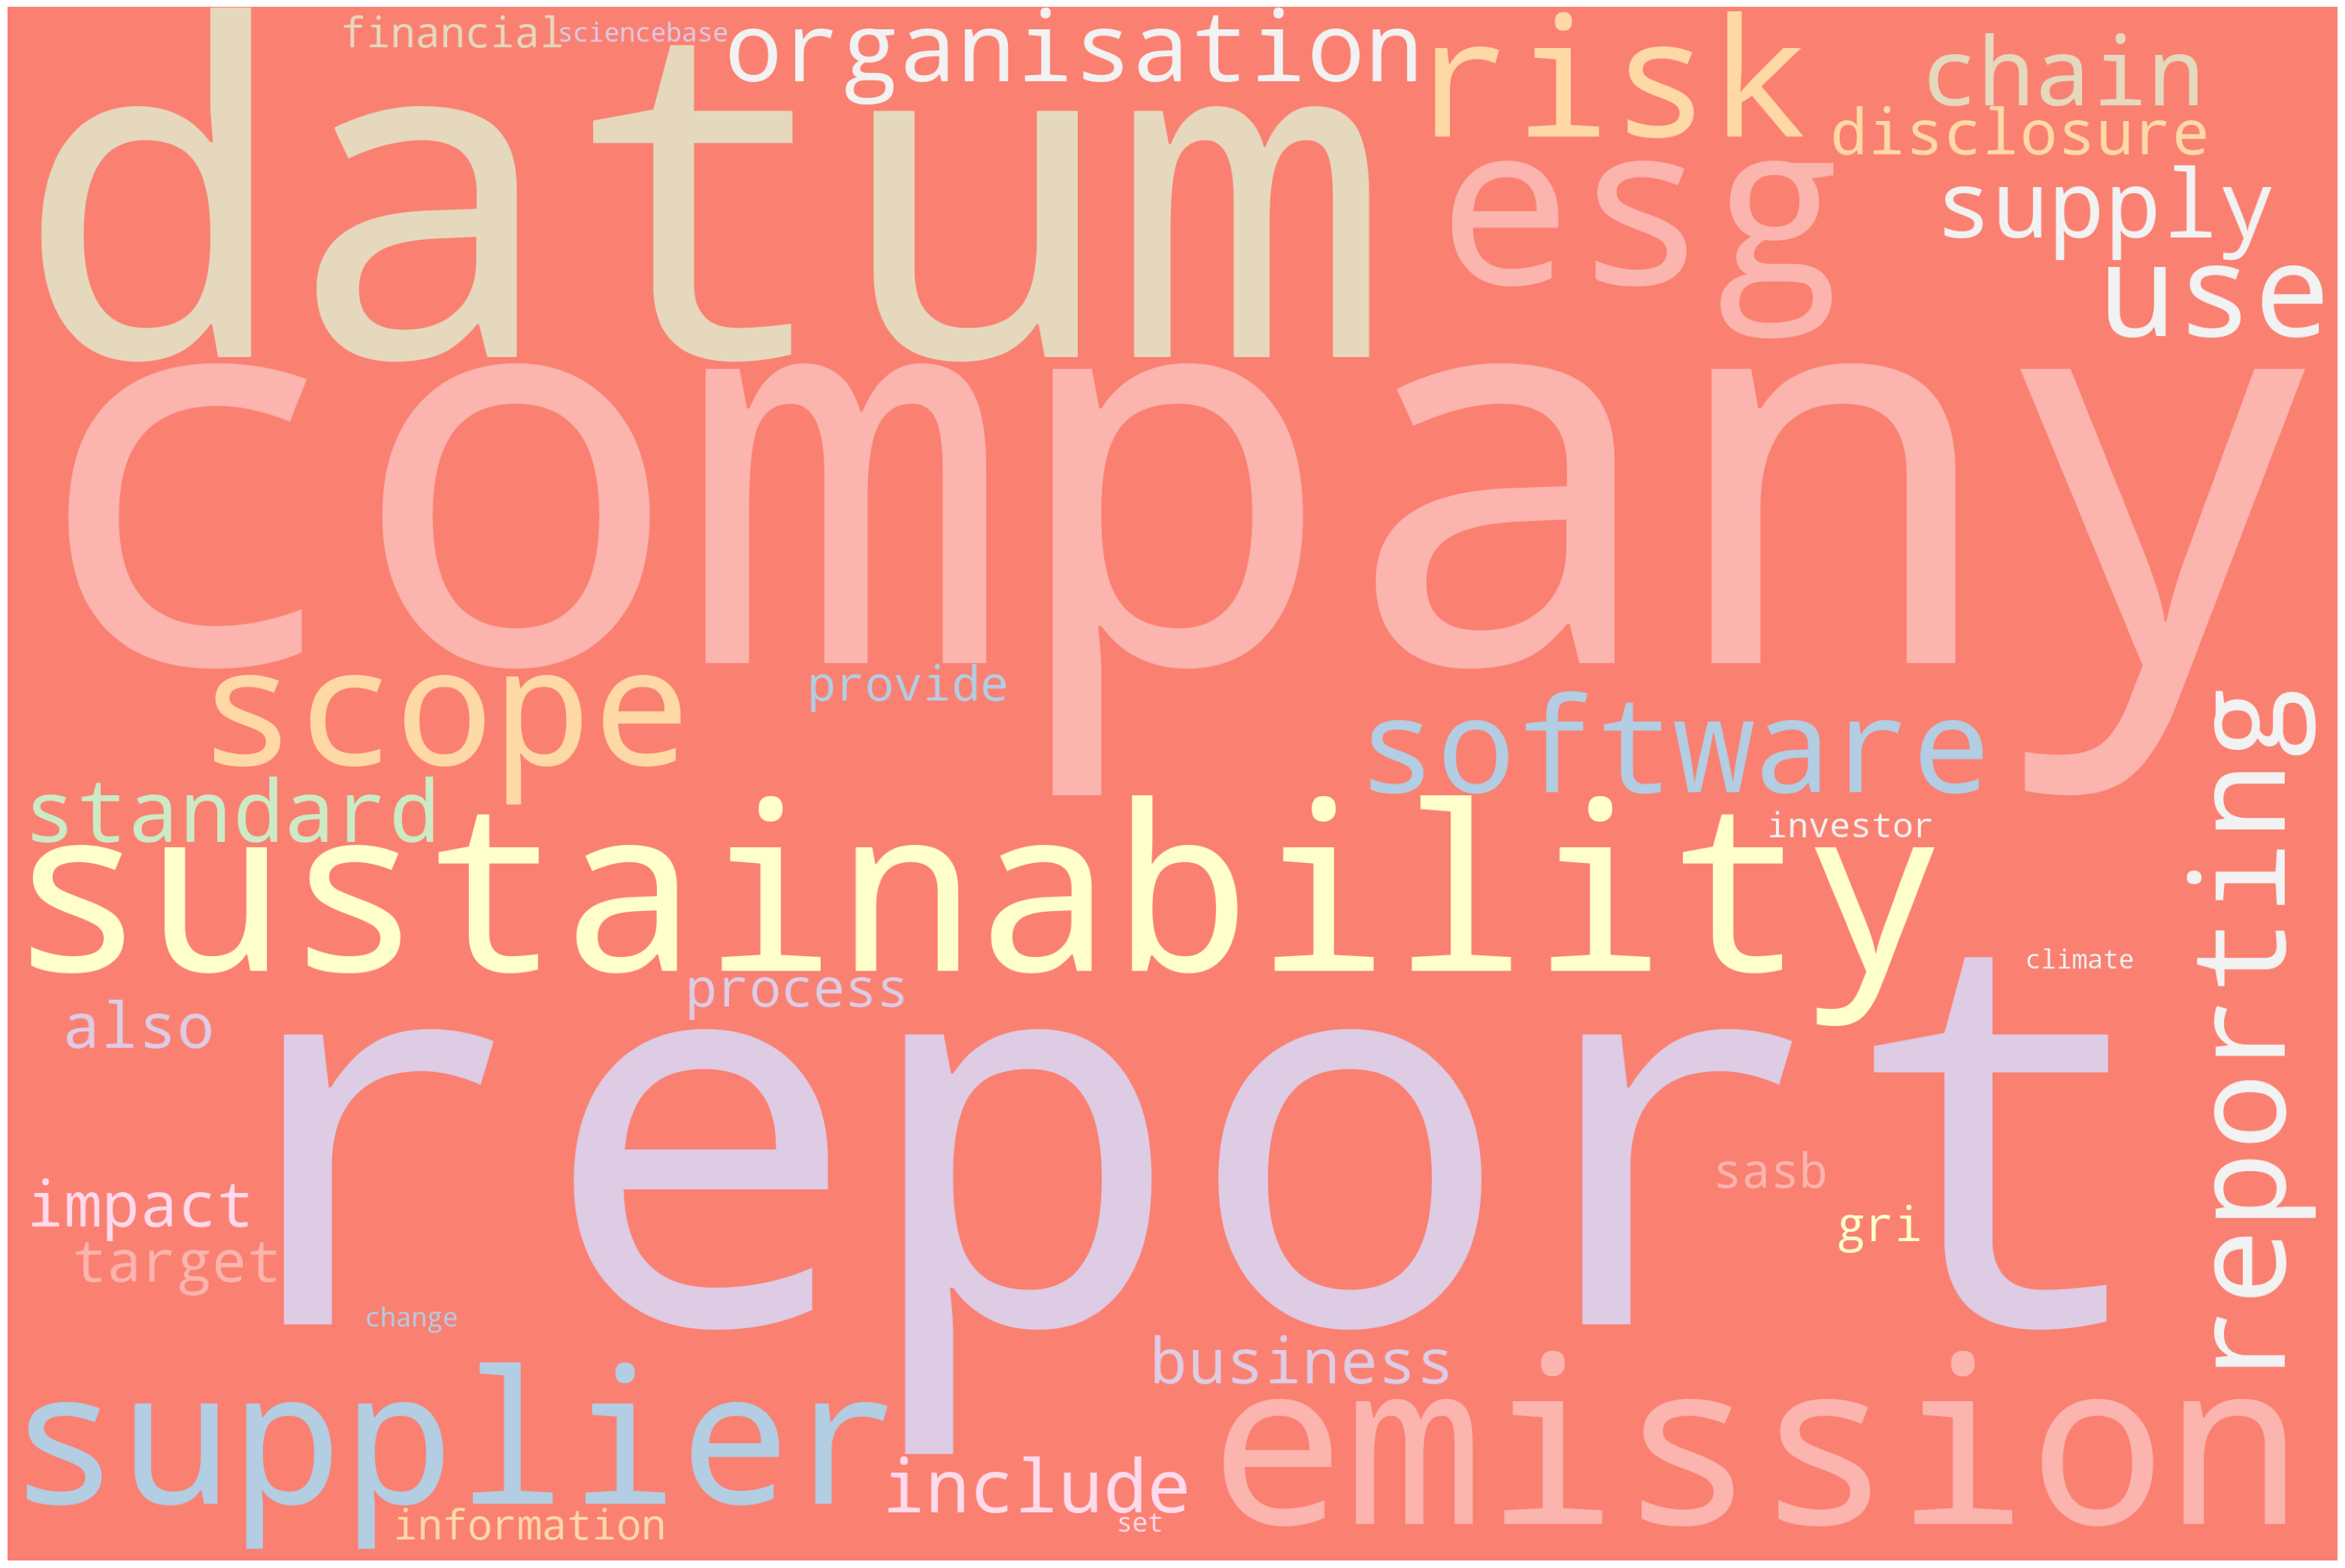

In [178]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
# Import package

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = stop_words).generate(wordclouddeneme)
# Plot
plot_cloud(wordcloud)

In [179]:
y=df_dominant_topic['Keywords'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
print(y)
keywords_list = [keyword for sublist in y for keyword in sublist]
print(keywords_list)
# Count the occurrences of each keyword
keyword_counts = pd.Series(keywords_list).value_counts()
print(keyword_counts)

0     [company, supplier, risk, sustainability, disc...
1     [target, company, report, emission, climate, s...
2     [esg, datum, company, report, emission, softwa...
3     [supplier, emission, esg, datum, report, compa...
4     [company, report, sustainability, emission, su...
                            ...                        
57    [supplier, emission, esg, datum, report, compa...
58    [esg, datum, company, report, emission, softwa...
59    [report, emission, supplier, company, standard...
60    [emission, datum, scope, company, report, supp...
61    [report, sustainability, standard, software, o...
Name: Keywords, Length: 62, dtype: object
['company', 'supplier', 'risk', 'sustainability', 'disclosure', 'esg', 'organisation', 'process', 'report', 'standard', 'target', 'company', 'report', 'emission', 'climate', 'sciencebase', 'set', 'sustainability', 'change', 'scope', 'esg', 'datum', 'company', 'report', 'emission', 'software', 'sustainability', 'use', 'scope', 'also', 'suppl

In [180]:
len(keyword_counts)

33

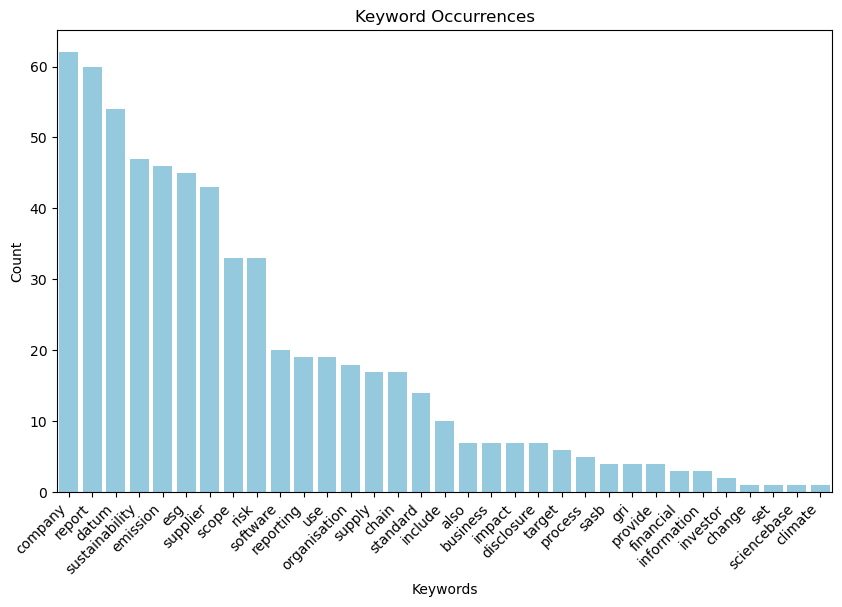

In [181]:
# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=keyword_counts.index, y=keyword_counts.values, color='skyblue')
plt.title('Keyword Occurrences')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()